In [1]:
# read /nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/data/fast_eval/NIHMS1014772-supplement-Supplemental_1.xlsx
import pandas as pd
import numpy as np
xls = pd.ExcelFile('/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/data/fast_eval/41592_2018_138_MOESM4_ESM.xlsx')


In [2]:
# get BLAT_ECOLX_Tenaillon2013
from tqdm import tqdm
from scipy import stats

results = {}

for name in tqdm(xls.sheet_names):

    df = pd.read_excel(xls, name)
    # dropnan 'mutation_effect_prediction_vae_ensemble'
    df = df.dropna(subset=[df.columns[df.columns.get_loc('mutant')+1],'mutation_effect_prediction_vae_ensemble'])
    # get mutant MIC_score mutation_effect_prediction_vae_ensemble
    df = df[['mutant', df.columns[df.columns.get_loc('mutant')+1], 'mutation_effect_prediction_vae_ensemble']]

    # 示例数据
    x = df[df.columns[df.columns.get_loc('mutant')+1]]
    y = df['mutation_effect_prediction_vae_ensemble']

    # 计算 Spearman 相关系数和 p 值
    spearman_corr, p_value = stats.spearmanr(x, y)
    # print(spearman_corr)
    results[name] = [spearman_corr,df]

100%|██████████| 44/44 [01:00<00:00,  1.38s/it]


In [12]:
results.keys()

dict_keys(['BRCA1_HUMAN_BRCT', 'B3VI55_LIPSTSTABLE', 'BLAT_ECOLX_Ranganathan2015', 'F7YBW7_MESOW_vae', 'RL401_YEAST_Fraser2016', 'CALM1_HUMAN_Roth2017', 'parEparD_Laub2015_all', 'UBC9_HUMAN_Roth2017', 'PABP_YEAST_Fields2013-doubles', 'SUMO1_HUMAN_Roth2017', 'RASH_HUMAN_Kuriyan', 'BG_STRSQ_hmmerbit', 'RL401_YEAST_Bolon2014', 'MK01_HUMAN_Johannessen', 'HSP82_YEAST_Bolon2016', 'YAP1_HUMAN_Fields2012-singles', 'BF520_env_Bloom2018', 'UBE4B_MOUSE_Klevit2013-singles', 'tRNA_mutation_effect', 'HG_FLU_Bloom2016', 'B3VI55_LIPST_Whitehead2015', 'TPK1_HUMAN_Roth2017', 'BLAT_ECOLX_Palzkill2012', 'GAL4_YEAST_Shendure2015', 'TIM_SULSO_b0', 'POLG_HCVJF_Sun2014', 'HIS7_YEAST_Kondrashov2017', 'TPMT_HUMAN_Fowler2018', 'DLG4_RAT_Ranganathan2012', 'MTH3_HAEAESTABILIZED_Tawfik2015', 'AMIE_PSEAE_Whitehead', 'BLAT_ECOLX_Tenaillon2013', 'BLAT_ECOLX_Ostermeier2014', 'BRCA1_HUMAN_RING', 'P84126_THETH_b0', 'PTEN_HUMAN_Fowler2018', 'PABP_YEAST_Fields2013-singles', 'IF1_ECOLI_Kishony', 'PA_FLU_Sun2015', 'RL401_YEA

In [3]:
# read precomputed data
xls = pd.ExcelFile('/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/data/fast_eval/41592_2018_138_MOESM5_ESM.xlsx')

In [7]:
xls.sheet_names
df = pd.read_excel(xls, 'S3_all_predictions_to_statitics')
df.spearmanr_ensemble_vae

0      0.522421
1      0.642436
2      0.510228
3      0.231582
4      0.488335
         ...   
103    0.571047
104    0.497527
105    0.545526
106    0.539582
107    0.645634
Name: spearmanr_ensemble_vae, Length: 108, dtype: float64

In [23]:
# 保留两位小数 ({k:v[0] for k,v in results.items()})
data_dict = {k:round(v[0],2) for k,v in results.items()}

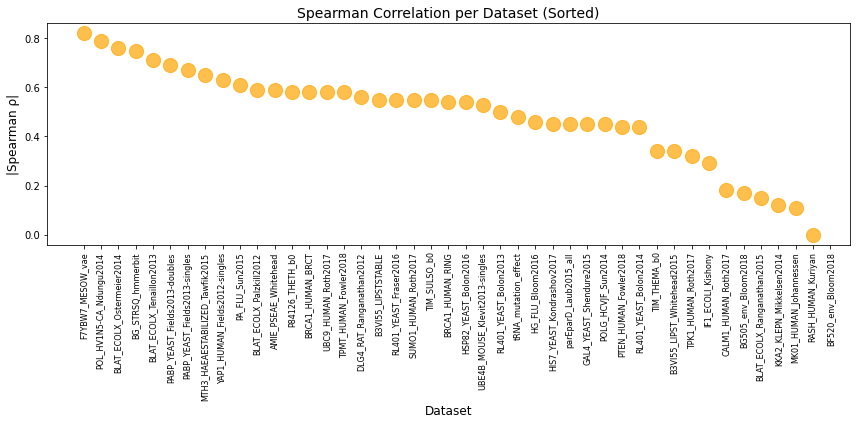

In [27]:
# Sort the dictionary by the absolute Spearman correlation in descending order
import matplotlib.pyplot as plt
sorted_data = dict(sorted(data_dict.items(), key=lambda x: abs(x[1]), reverse=True))

# Extract sorted keys and values
sorted_datasets = list(sorted_data.keys())
sorted_values = [abs(v) for v in sorted_data.values() if not np.isnan(v)]

# Set a fixed marker size for all points
fixed_marker_size = 200

# Create the plot with sorted data
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with fixed marker size
scatter = ax.scatter(range(len(sorted_values)), sorted_values, c='orange', s=fixed_marker_size, label='Latent (DeepSequence)', alpha=0.7)

# Set x-ticks and labels
ax.set_xticks(range(len(sorted_datasets)))
ax.set_xticklabels(sorted_datasets, rotation=90, fontsize=8)

# Set axis labels and title
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('|Spearman ρ|', fontsize=12)
ax.set_title('Spearman Correlation per Dataset (Sorted)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [1]:

import pandas as pd
import glob
import numpy as np
files = glob.glob('/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/results_133/*/')
# key = 'BG_STRSQ_Abate2015-enrichment'
vae_onehot = []
vae_onehot_ddg = []
for key in [ i.split('/')[-2] for i in  files]:
    try:
        df_ = pd.read_csv(f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/results_133/{key}/results.csv')

        # df_ =pd.read_csv(f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/results/BLAT_ECOLX_Ranganathan2015-2500/results_BLAT_ECOLX_Ranganathan2015-2500.csv')
        CORE_PREDICTORS = [
            'vae+onehot', 
            'vae+onehot+ddg'
        ]
        for model in CORE_PREDICTORS:
            # print(model, df_[df_.predictor==model].spearman.mean())
            if model == 'vae+onehot':
                vae_onehot.append(df_[df_.predictor==model].spearman.mean())
            else:
                vae_onehot_ddg.append(df_[df_.predictor==model].spearman.mean())
    except:
        vae_onehot.append(np.nan)
        vae_onehot_ddg.append(np.nan)
        print(key)
vae_onehot = np.array(vae_onehot)
vae_onehot_ddg = np.array(vae_onehot_ddg)
((vae_onehot_ddg-vae_onehot)>0).sum()
# analyze results
spearman_corr = []
coarse_type = []
dir_names = [ i.split('/')[-2] for i in  files]
import pandas as pd
df = pd.read_csv('/work/commons/proteingym/DMS_substitutions.csv')
filtered_df = df[df['coarse_selection_type'].isin(['Binding', 'Activity', 'Expression','OrganismalFitness'])]
for dir_name in  dir_names: 


    groundtruth = f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/data/fast_eval/{dir_name}/data.csv'
    deepseq = f'/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/inference/fast_eval/{dir_name}/DeepSequence/pll.csv'

    df = pd.read_csv(groundtruth)
    df_deepseq = pd.read_csv(deepseq)
    from scipy.stats import spearmanr

    spearman_corr.append(-spearmanr(df['log_fitness'],df_deepseq['pll'])[0])
    coarse_type.append(filtered_df[filtered_df.DMS_id==dir_name].reset_index(drop=True).coarse_selection_type[0])

NRAM_I33A0_Jiang_2016
KCNH2_HUMAN_Kozek_2020
POLG_CXB3N_Mattenberger_2021
F7YBW8_MESOW_Aakre_2015
NPC1_HUMAN_Erwood_2022_RPE1
BRCA2_HUMAN_Erwood_2022_HEK293T
AICDA_HUMAN_Gajula_2014_3cycles
RAF1_HUMAN_Zinkus-Boltz_2019
GCN4_YEAST_Staller_2018
SPG1_STRSG_Wu_2016
F7YBW7_MESOW_Ding_2023
A0A140D2T1_ZIKV_Sourisseau_2019
POLG_HCVJF_Qi_2014
OPSD_HUMAN_Wan_2019
SCN5A_HUMAN_Glazer_2019
GLPA_HUMAN_Elazar_2016
HIS7_YEAST_Pokusaeva_2019
B2L11_HUMAN_Dutta_2010_binding-Mcl-1


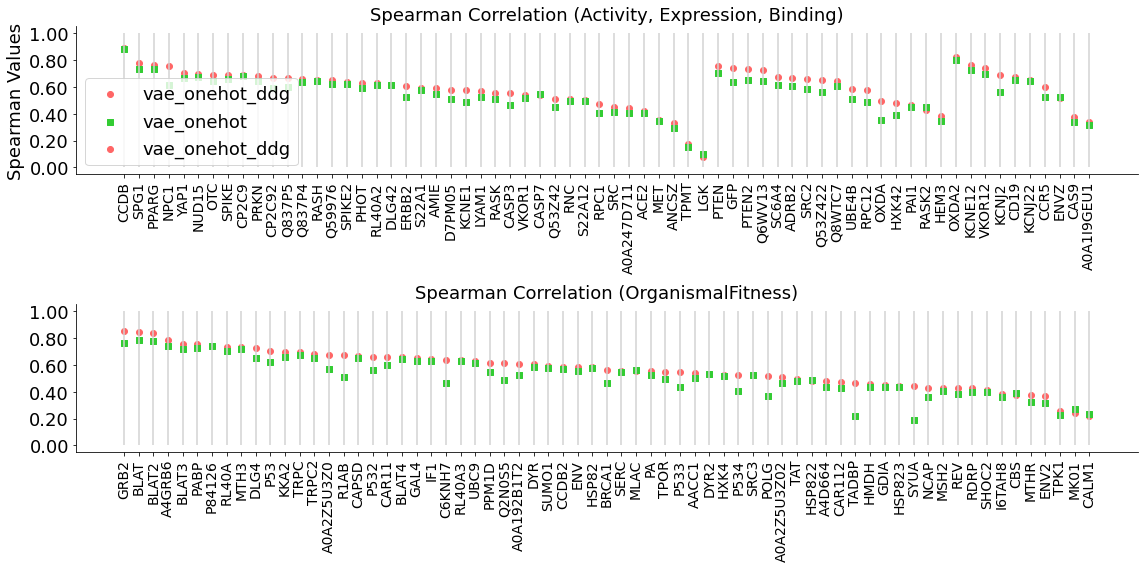

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 假设数据 df 已经定义
df = pd.DataFrame({
    'dir_names': dir_names,
    'coarse_type': coarse_type,
    'vae_onehot_ddg': vae_onehot_ddg,
    'vae_onehot': vae_onehot,
    'spearman_corr': spearman_corr
})

# Step 1: 过滤掉 vae_onehot_ddg 中的 NaN 值
df = df.dropna(subset=['vae_onehot_ddg'])

# Step 2: 按照 vae_onehot_ddg 从大到小排序
df = df.sort_values(by='vae_onehot_ddg', ascending=False)

# Step 3: 按照 coarse_type 分类
types_1 = ['Activity', 'Expression', 'Binding']  # 第一个子图中的类型
types_2 = ['OrganismalFitness']  # 第二个子图中的类型

# 对 dir_names 进行处理，分离前缀并添加编号
dir_name_prefixes = [x.split('_')[0] for x in df['dir_names']]
name_counter = {}

# 遍历所有前缀，检查是否重复，重复则添加编号
processed_dir_names = []
for name in dir_name_prefixes:
    if name not in name_counter:
        name_counter[name] = 1
    else:
        name_counter[name] += 1
    if name_counter[name] > 1:
        processed_dir_names.append(f'{name}{name_counter[name]}')
    else:
        processed_dir_names.append(name)

# 更新处理后的 dir_names 列
df['processed_dir_names'] = processed_dir_names

# 创建图形和两个子图对象
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))

# 绘制第一个子图 (Activity, Expression, OrganismalFitness)
for c_type in types_1:
    df_subset = df[df['coarse_type'] == c_type]
    
    # 绘制 vae_onehot_ddg 的点
    ax1.scatter(df_subset['processed_dir_names'], df_subset['vae_onehot_ddg'], label=f'{c_type} vae_onehot_ddg', marker='o', color='#FF6666')
    
    # 绘制 vae_onehot 的点
    ax1.scatter(df_subset['processed_dir_names'], df_subset['vae_onehot'], label=f'{c_type} vae_onehot', marker='s', color='#33CC33')

# 为每个点绘制沿 y 轴的浅灰色实线
ax1.vlines(range(len(df[df['coarse_type'].isin(types_1)])), ymin=0, ymax=1, colors='#D3D3D3', linestyles='solid')

# 设置第一个子图的 x 轴和 y 轴
ax1.set_xticks(range(len(df[df['coarse_type'].isin(types_1)])))
# df in types_1
ax1.set_xticklabels(df[df['coarse_type'].isin(types_1)]['processed_dir_names'], rotation=90, fontsize=14)
ax1.set_yticks(np.arange(0, 1.1, 0.2))
ax1.set_yticklabels([f'{i:.2f}' for i in np.arange(0, 1.1, 0.2)], fontsize=18)
ax1.set_ylabel('Spearman Values', fontsize=18)
ax1.set_title('Spearman Correlation (Activity, Expression, Binding)', fontsize=18)

# 绘制第二个子图 (Binding)
for c_type in types_2:
    # 当前类型的数据
    df_subset = df[df['coarse_type'] == c_type]
    
    # 绘制 vae_onehot_ddg 的点
    ax2.scatter(df_subset['processed_dir_names'], df_subset['vae_onehot_ddg'], label=f'{c_type} vae_onehot_ddg', marker='o', color='#FF6666')
    
    # 绘制 vae_onehot 的点
    ax2.scatter(df_subset['processed_dir_names'], df_subset['vae_onehot'], label=f'{c_type} vae_onehot', marker='s', color='#33CC33')

# 为每个点绘制沿 y 轴的浅灰色实线
ax2.vlines(range(len(df[df['coarse_type'].isin(types_2)])), ymin=0, ymax=1, colors='#D3D3D3', linestyles='solid')

# 设置第二个子图的 x 轴和 y 轴
ax2.set_xticks(range(len(df[df['coarse_type'].isin(types_2)])))
# df in types_1
ax2.set_xticklabels(df[df['coarse_type'].isin(types_2)]['processed_dir_names'], rotation=90, fontsize=14)
ax2.set_yticks(np.arange(0, 1.1, 0.2))
ax2.set_yticklabels([f'{i:.2f}' for i in np.arange(0, 1.1, 0.2)], fontsize=18)
ax2.set_title('Spearman Correlation (OrganismalFitness)', fontsize=18)

# 隐藏顶部和右侧的边框
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# 创建图例
handles, labels = ax1.get_legend_handles_labels()
handles = handles[:3]
labels = [i.split(' ')[-1] for i in labels[:3]]
ax1.legend(handles, labels, fontsize=18, loc='lower left')

# 调整布局和显示图表
plt.tight_layout()
plt.savefig('/work/ziang/PSNet/fig4b.pdf', dpi=300)
plt.show()


23.25
43.5
55


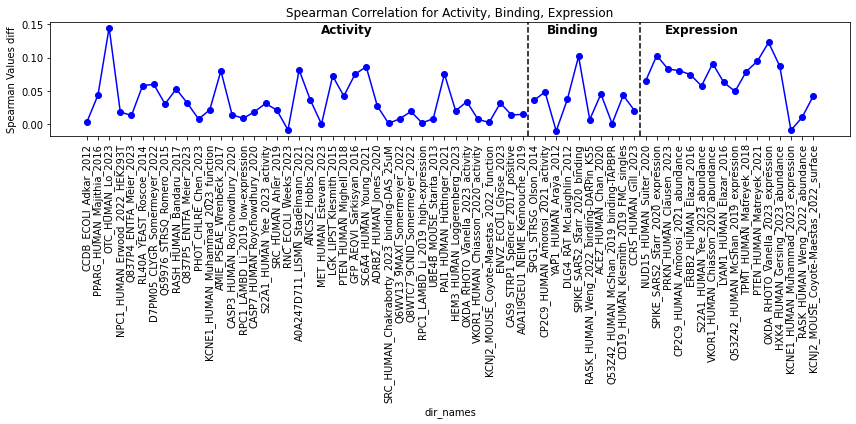

In [5]:
df = pd.DataFrame({
    'dir_names': dir_names,
    'coarse_type': coarse_type,
    'vae_onehot_ddg': vae_onehot_ddg,
    'vae_onehot': vae_onehot,
    'spearman_corr': spearman_corr
})

# Step 1: 过滤掉 vae_onehot_ddg 中的 NaN 值
df = df.dropna(subset=['vae_onehot_ddg'])

# Step 2: 按照 vae_onehot_ddg 从大到小排序
df = df.sort_values(by='vae_onehot_ddg', ascending=False)

# Step 3: 按照 coarse_type 分类
types = ['Activity', 'Binding', 'Expression']

# 创建图形
plt.figure(figsize=(12, 6))

# 记录每个类别的分隔位置
sep_lines = []

# 用不同的颜色绘制每个类别的值
for c_type in types:
    # 当前类型的数据
    df_subset = df[df['coarse_type'] == c_type]
    
    # 绘制 vae_onehot_ddg, vae_onehot, spearman_corr
    plt.plot(df_subset['dir_names'], df_subset['vae_onehot_ddg']-df_subset['vae_onehot'], label=f'{c_type} vae_onehot_ddg vae_onehot diff', marker='o', linestyle='-', color='blue')


    # 记录分隔线的位置
    if not df_subset.empty:
        sep_lines.append(df_subset.index[-1] + 0.5)
for i, (sep, label) in enumerate(zip([51.5, 40.5,200], types)):
    # 计算 mid_point 的方式，对于最后一个 type，mid_point 需要特殊处理
    if i < len(sep_lines) - 1:
        mid_point = (sep_lines[i] + (sep_lines[i-1] if i > 0 else 0)) / 2
    if sep<100:
        plt.axvline(x=sep-2+i, color='black', linestyle='--')
    else:
        mid_point = 55
    

    print(mid_point)
    # 在每个分隔区域上方添加文本标注
    plt.text(mid_point, plt.ylim()[1]-0.02, label, ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')


# # 添加虚线来分隔不同的类型
# for i,sep in enumerate(sep_lines[:-1]):  # 最后一组不需要分隔
#     plt.axvline(x=sep-2+i, color='black', linestyle='--')

# 设置图表的 x 轴和 y 轴
plt.xticks(rotation=90)
plt.xlabel('dir_names')
plt.ylabel('Spearman Values diff')
plt.title('Spearman Correlation for Activity, Binding, Expression')
# plt.legend()

# 调整布局和显示图表
plt.tight_layout()
plt.show()

In [6]:
for c_type in types:
    # 当前类型的数据
    df_subset = df[df['coarse_type'] == c_type]
    print((df_subset['vae_onehot_ddg']-df_subset['vae_onehot']).mean())   


0.032810625000000024
0.033107999999999985
0.06842124999999998


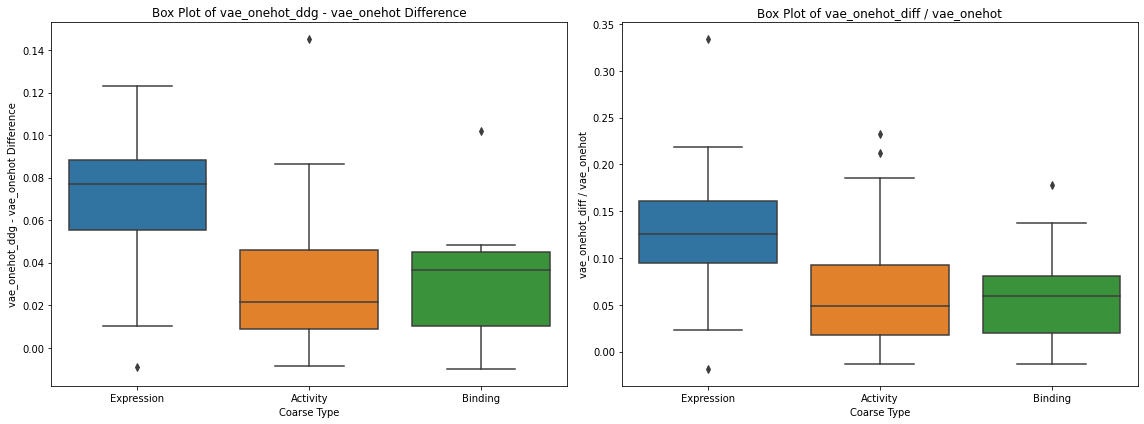

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'dir_names': dir_names,
    'coarse_type': coarse_type,
    'vae_onehot_ddg': vae_onehot_ddg,
    'vae_onehot': vae_onehot,
    'spearman_corr': spearman_corr
})

# Step 1: Remove NaN values from vae_onehot_ddg
df = df.dropna(subset=['vae_onehot_ddg'])

# Step 2: Calculate the differences
df['vae_onehot_diff'] = df['vae_onehot_ddg'] - df['vae_onehot']
df['ratio'] = df['vae_onehot_diff'] / df['vae_onehot']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Boxplot for vae_onehot_diff
sns.boxplot(x='coarse_type', y='vae_onehot_diff', data=df, ax=axes[0])
axes[0].set_title('Box Plot of vae_onehot_ddg - vae_onehot Difference')
axes[0].set_xlabel('Coarse Type')
axes[0].set_ylabel('vae_onehot_ddg - vae_onehot Difference')

# Plot 2: Boxplot for vae_onehot_diff / vae_onehot
sns.boxplot(x='coarse_type', y='ratio', data=df, ax=axes[1])
axes[1].set_title('Box Plot of vae_onehot_diff / vae_onehot')
axes[1].set_xlabel('Coarse Type')
axes[1].set_ylabel('vae_onehot_diff / vae_onehot')

# Adjust layout to ensure plots are nicely spaced
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import glob
a = glob.glob("/nethome/zli3161/DATA-nash/combining-evolutionary-and-assay-labelled-data/results/CCDB_ECOLI_Adkar_2012/results*vae+onehot+ddg.npy")